### Full documentation, including interactive tutorials at https://plantcv.readthedocs.io/en/latest/

In [1]:
# Import PlantCV functions 
from plantcv import plantcv as pcv


In [2]:
# Set the global debug parameter to plot
pcv.params.debug = "plot"


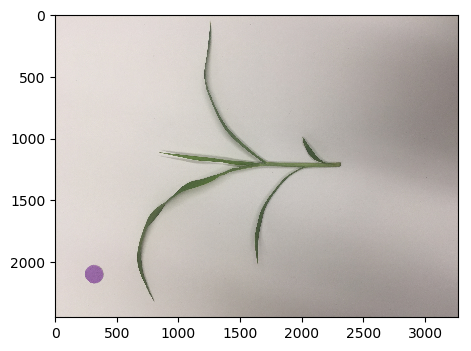

In [3]:
# Read in the plant image 
img, path, filename = pcv.readimage("whole_sataria_plant.JPG")


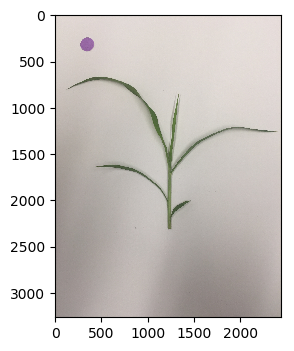

In [4]:
# Rotate the image so the plant is upright 
img2 = pcv.rotate(img=img, rotation_deg=-90, crop=False)


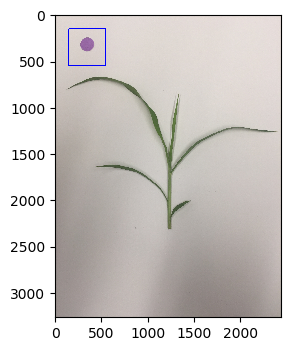

In [5]:
# Increase global line thickness parameter (default=5)
pcv.params.line_thickness = 10

# Draw a region of interest around the size marker 
marker_roi, marker_roi_h = pcv.roi.rectangle(img=img2, x=150, y=150, h=400, w=400)


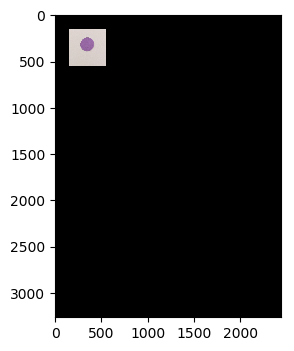

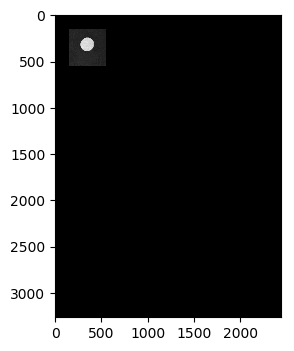

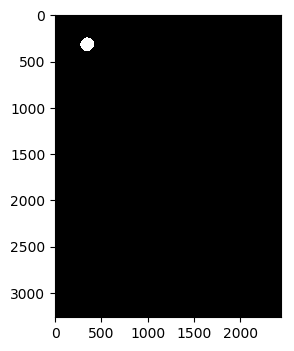

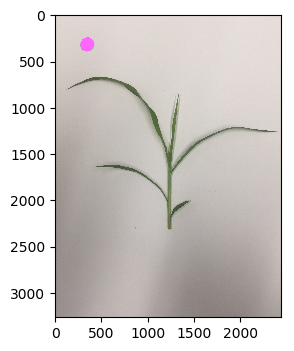

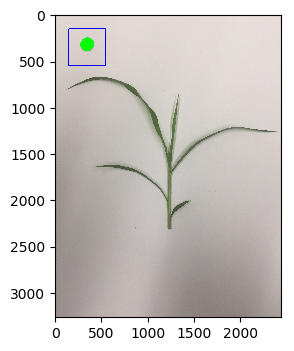

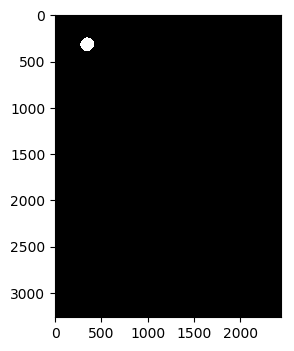

/Users/hschuhl/anaconda3/envs/plantcv/lib/python3.7/site-packages/plantcv-3.3.0+3.ge19d9133-py3.7.egg/plantcv/plantcv/object_composition.py:49: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  group = np.vstack(contours[i] for i in ids)


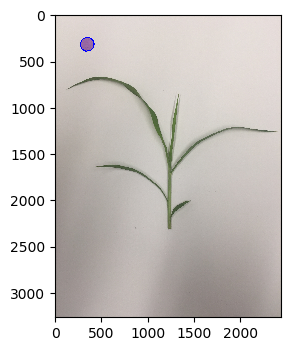

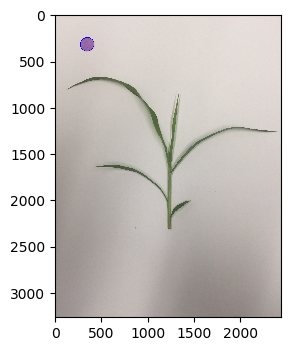

In [6]:
# Find the area of the size marker. The function automatically stores data about size marker area 
# to the Outputs class. 
marker_img = pcv.report_size_marker_area(img=img2, roi_contour=marker_roi, roi_hierarchy=marker_roi_h, 
                                         marker='detect', objcolor='light', thresh_channel='s', thresh=50)


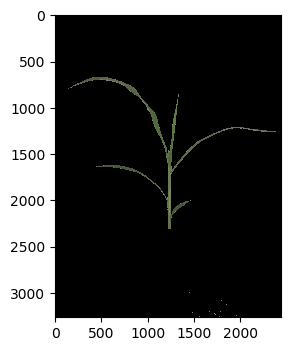

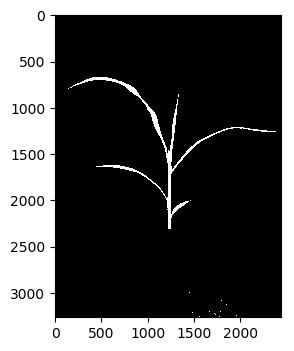

In [7]:
# Threshold out the plant based on a range of RGB values 
mask, masked_img = pcv.threshold.custom_range(rgb_img=img2, lower_thresh=[10,10,10], 
                                              upper_thresh=[135,255,135], channel='RGB')


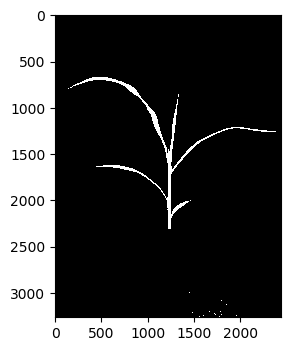

In [8]:
# Close the small dark spots (pepper) in the plant mask
closed_mask = pcv.closing(gray_img=mask)


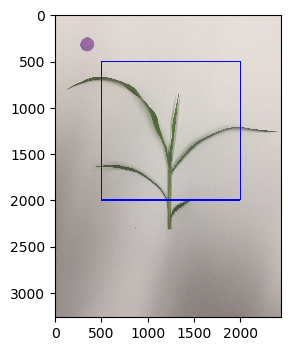

In [9]:
# Draw a region of interest around the size marker 
plant_roi, plant_roi_h = pcv.roi.rectangle(img=img2, x=500, y=500, h=1500, w=1500)


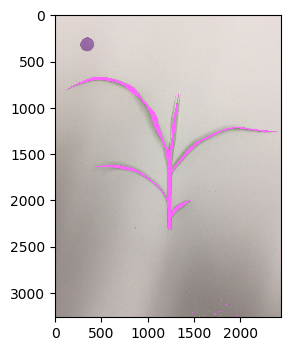

In [10]:
# Find the plant contour and hierarchy 
id_objects, obj_hierarchy = pcv.find_objects(img2, closed_mask)


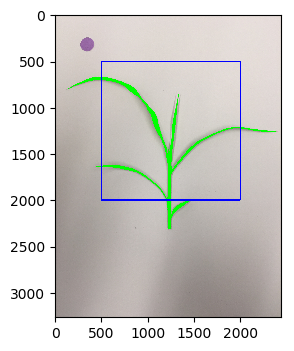

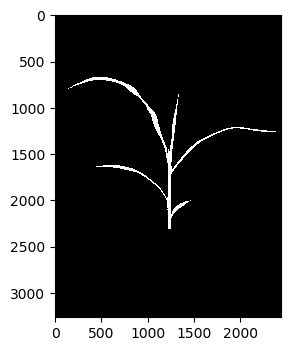

In [11]:
# Filter to keep the objects within the region of interest 
objects, hier, kept_mask, obj_area = pcv.roi_objects(img=img2, roi_type='partial', roi_contour=plant_roi, 
                                                     roi_hierarchy=plant_roi_h, object_contour=id_objects, 
                                                     obj_hierarchy=obj_hierarchy)


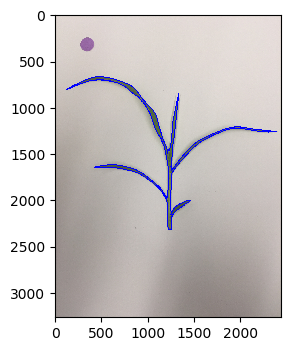

In [12]:
# Combine objects 
combined_obj, mask = pcv.object_composition(img=img2, contours=objects, hierarchy=hier)


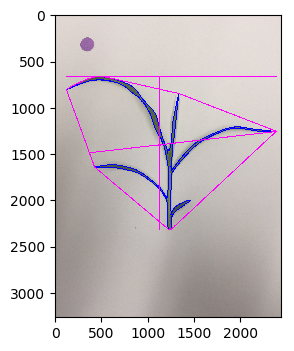

In [13]:
# Measure the plant 
shape_img = pcv.analyze_object(img2, obj=combined_obj, mask=mask)

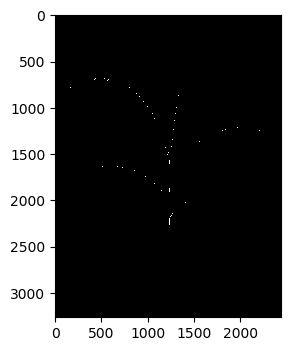

In [14]:
# Skeletonize the plant mask (make a one-pixel wide representation)
skeleton = pcv.morphology.skeletonize(mask=kept_mask)


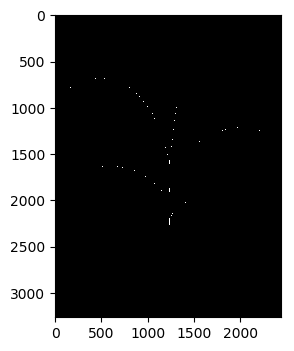

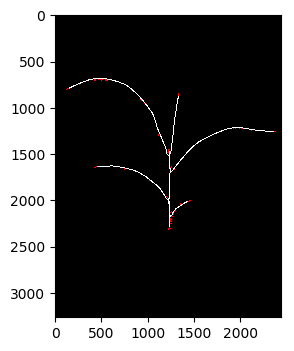

In [15]:
# Prune back barbs on the skeleton so only the main structure of the plant is left
# This step takes up to about 30 seconds.
pruned = pcv.morphology.prune(skel_img=skeleton, size=30)


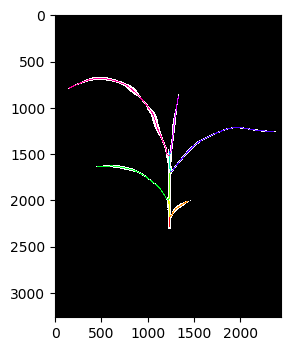

In [16]:
# Segment the skeleton. This function uses branch points to separate the skeleton 
# into pieces 
seg_img, edge_objects = pcv.morphology.segment_skeleton(skel_img=pruned, mask=kept_mask)


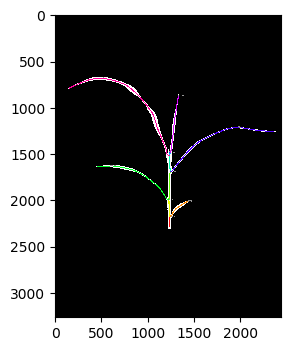

In [17]:
# Measure the geodesic distance of each segment 
labeled_img= pcv.morphology.segment_path_length(segmented_img=seg_img, objects=edge_objects)


In [18]:
# Print out a text file with all the data collected 
pcv.print_results(filename = 'sataria_plant_data.txt')

There are other functions to collect measurements found in the morphology sub-package (Read the Docs
tutorial here https://plantcv.readthedocs.io/en/latest/morphology_tutorial/). Images get labeled with 
data. Users can change text size and thickness with `pcv.params.text_size` and `pcv.params.text_thickness`.
Additionally, using `%matplotlib notebook` will plot images in an interactive window, allowing the user to
zoom in on points of interest. 